In [2]:
# IMPORTS 
# GENERAL IMPORTS
import os
#import pickle5 as pickle
import pickle
import numpy as np 
import matplotlib.pyplot as plt 
# FOR INTERPOLATION
from scipy import interpolate

In [3]:
path_raw_data = "raw_instrumental_measures"
path_targets = "sensory_measures"

In [4]:
# Explore the data

filenames = os.listdir(path_raw_data) # returns a list of names of files inside the folder
n_measurements = len(filenames)

# Try to open the first dictionary to visualize the keys
for namefile in filenames:
  with open(os.path.join(path_raw_data,namefile),'rb') as data:
    print('Loading features of apple sample n ' + namefile)
    obj = pickle.load(data)
    break

# obj is a dictionary
# Visualize the keys
print('\nThe keys of the dictionary are')
for key in obj.keys():
  print('- '+key)

# Visualize the features of the sample 
print('\n')
print('Mean weight = '+str(obj['Mean_weight']))
print('------------')
print('°Brix = '+str(obj['°Brix']))
print('------------')
print('Malic_acid_per_100g_juice = '+str(obj['Malic_acid_per_100g_juice']))
print('------------')
print('%Juice = '+str(obj['%Juice']))
print('------------')
print('%Dry_matter = '+str(obj['%Dry_matter']))

Loading features of apple sample n 1

The keys of the dictionary are
- Mean_weight
- °Brix
- Malic_acid_per_100g_juice
- %Juice
- %Dry_matter
- Texture_measures


Mean weight = 222.0605555555556
------------
°Brix = 12.35
------------
Malic_acid_per_100g_juice = 8.185
------------
%Juice = 47.22589653145208
------------
%Dry_matter = 14.402460456942004


In [5]:
# Texture measures is itself a dictionary!
print('\nThe keys of the texture measures dictionary are')
for sample in obj['Texture_measures'].keys():
  print('- '+sample)
# This is because the measures have been taken for several apple samples inside each variety. 
# And finally each measure of a different sample of apple of the same variety is itself a dictionary! 
print('\nThe data for one sample measurements are stored in a dictionary, with keys')
for key in obj['Texture_measures'][sample].keys():
  print('- '+key)


The keys of the texture measures dictionary are
- Golden_1
- Golden_10
- Golden_11
- Golden_12
- Golden_13
- Golden_14
- Golden_15
- Golden_16
- Golden_17
- Golden_2
- Golden_3
- Golden_4
- Golden_5
- Golden_6
- Golden_7
- Golden_8
- Golden_9

The data for one sample measurements are stored in a dictionary, with keys
- Time
- Force
- Strain
- Sound
- Stress
- Distance


Since we are going to average out the measures for different samples, we need series that have the same number of points. Furthermore in order to deal with subsequent problem of regression, we need also that different samples series to have the same number of points. 

In [6]:
# So... We are going to plot the different texture measures! 
time = obj['Texture_measures'][sample]['Time'] # Just progressive time, not useful
force = obj['Texture_measures'][sample]['Force']
strain = obj['Texture_measures'][sample]['Strain'] 
sound = obj['Texture_measures'][sample]['Sound']
stress = obj['Texture_measures'][sample]['Stress'] # Very similar to force
distance = obj['Texture_measures'][sample]['Distance'] # Similar in concept to strain

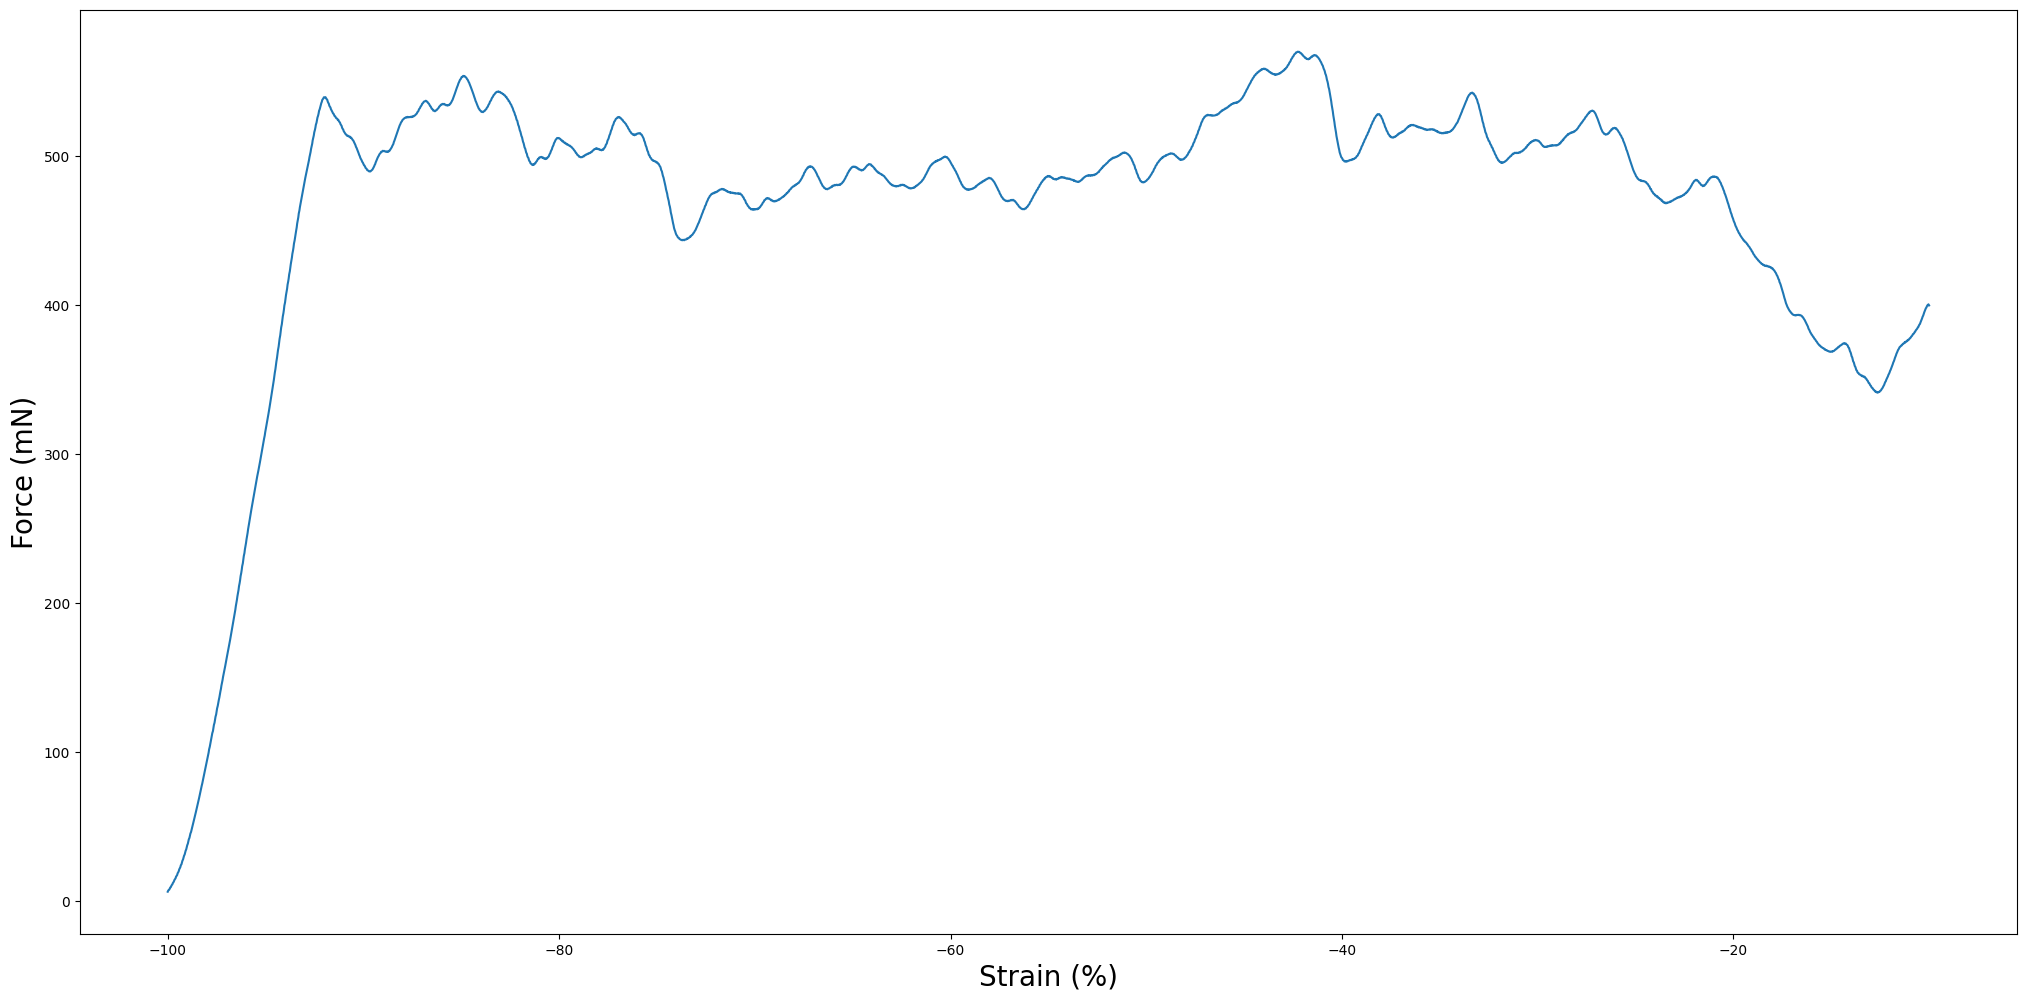

In [7]:
# Plot force against strain
plt.figure(figsize=(25,12))
plt.plot(strain,force)
plt.xlabel('Strain (%)')
plt.ylabel('Force (mN)')
axes = plt. gca()
axes. xaxis. label. set_size(20)
axes. yaxis. label. set_size(20)
plt.show()

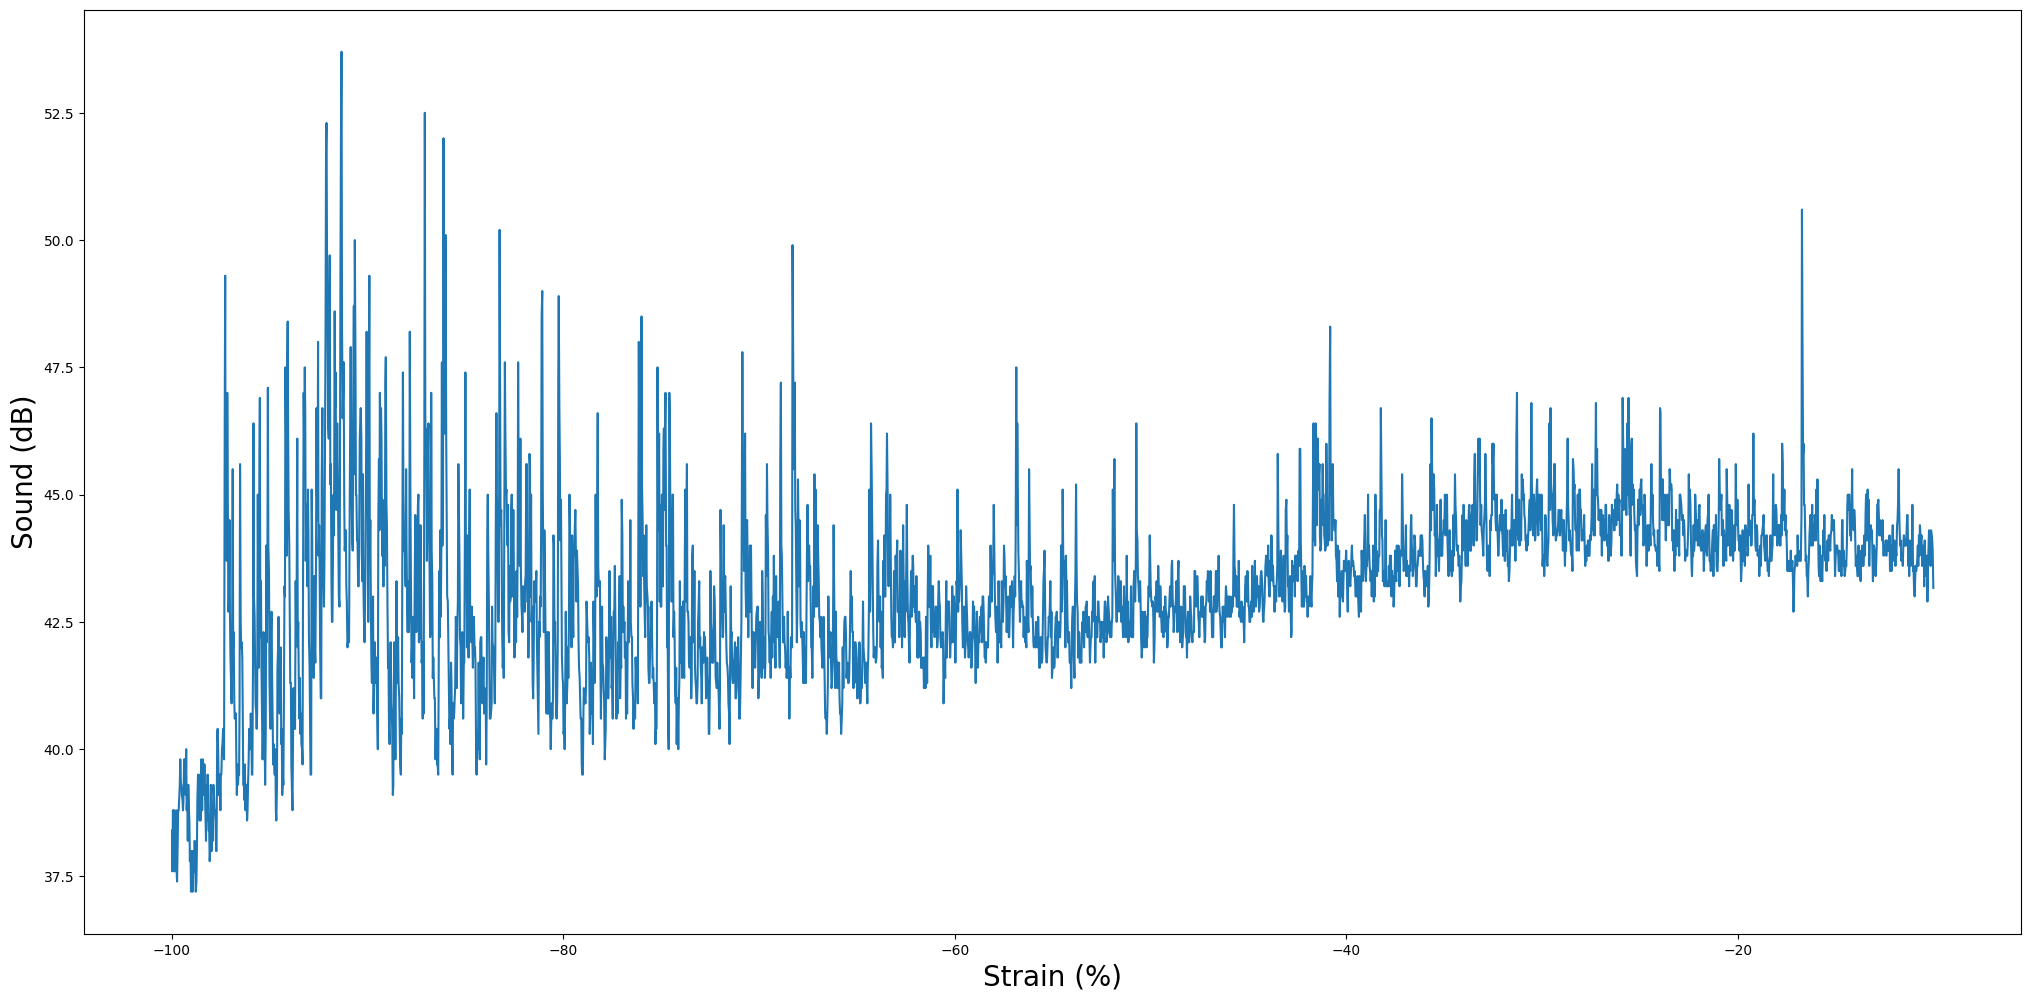

In [8]:
# Plot sound against strain
plt.figure(figsize=(25,12))
plt.plot(strain,sound)
plt.xlabel('Strain (%)')
plt.ylabel('Sound (dB)')
axes = plt. gca()
axes. xaxis. label. set_size(20)
axes. yaxis. label. set_size(20)
plt.show()

In [16]:
# To increase the complexity, every sample measures have a different number of points! This is due to the fact that even slight changes in the
# dimension of the apple samples can cause an increase in the time needed by the texture analyzer to reach 90% compression, and consequently cause the instrument
# to record more data points

for sample in obj['Texture_measures'].keys():
  print(len(obj['Texture_measures'][sample]['Force']))

3400
3400
3179
3169
3298
3176
3254
3082
3158
3146
3088
3400
3320
3104
3293
3244
3301


In [17]:
# In order to reduce all the samples to have the same length we will use spline interpolation and sample the profile in 200 equally spaced points.
# Define the function 
def interpolate_spline(in_x,in_y,x_bounds=(0,100),output_length=200):
    # in_x, in_y -> couples of input points to be interpolated
    # x_bounds -> tuple with the bounds of the output x, default = (0,100)
    # ouput_length -> length 
    s = interpolate.InterpolatedUnivariateSpline(in_x, in_y)
    xfit = np.linspace(x_bounds[0],x_bounds[1],output_length) # fit 200 points 
    yfit = s(xfit)
    return (xfit,yfit)

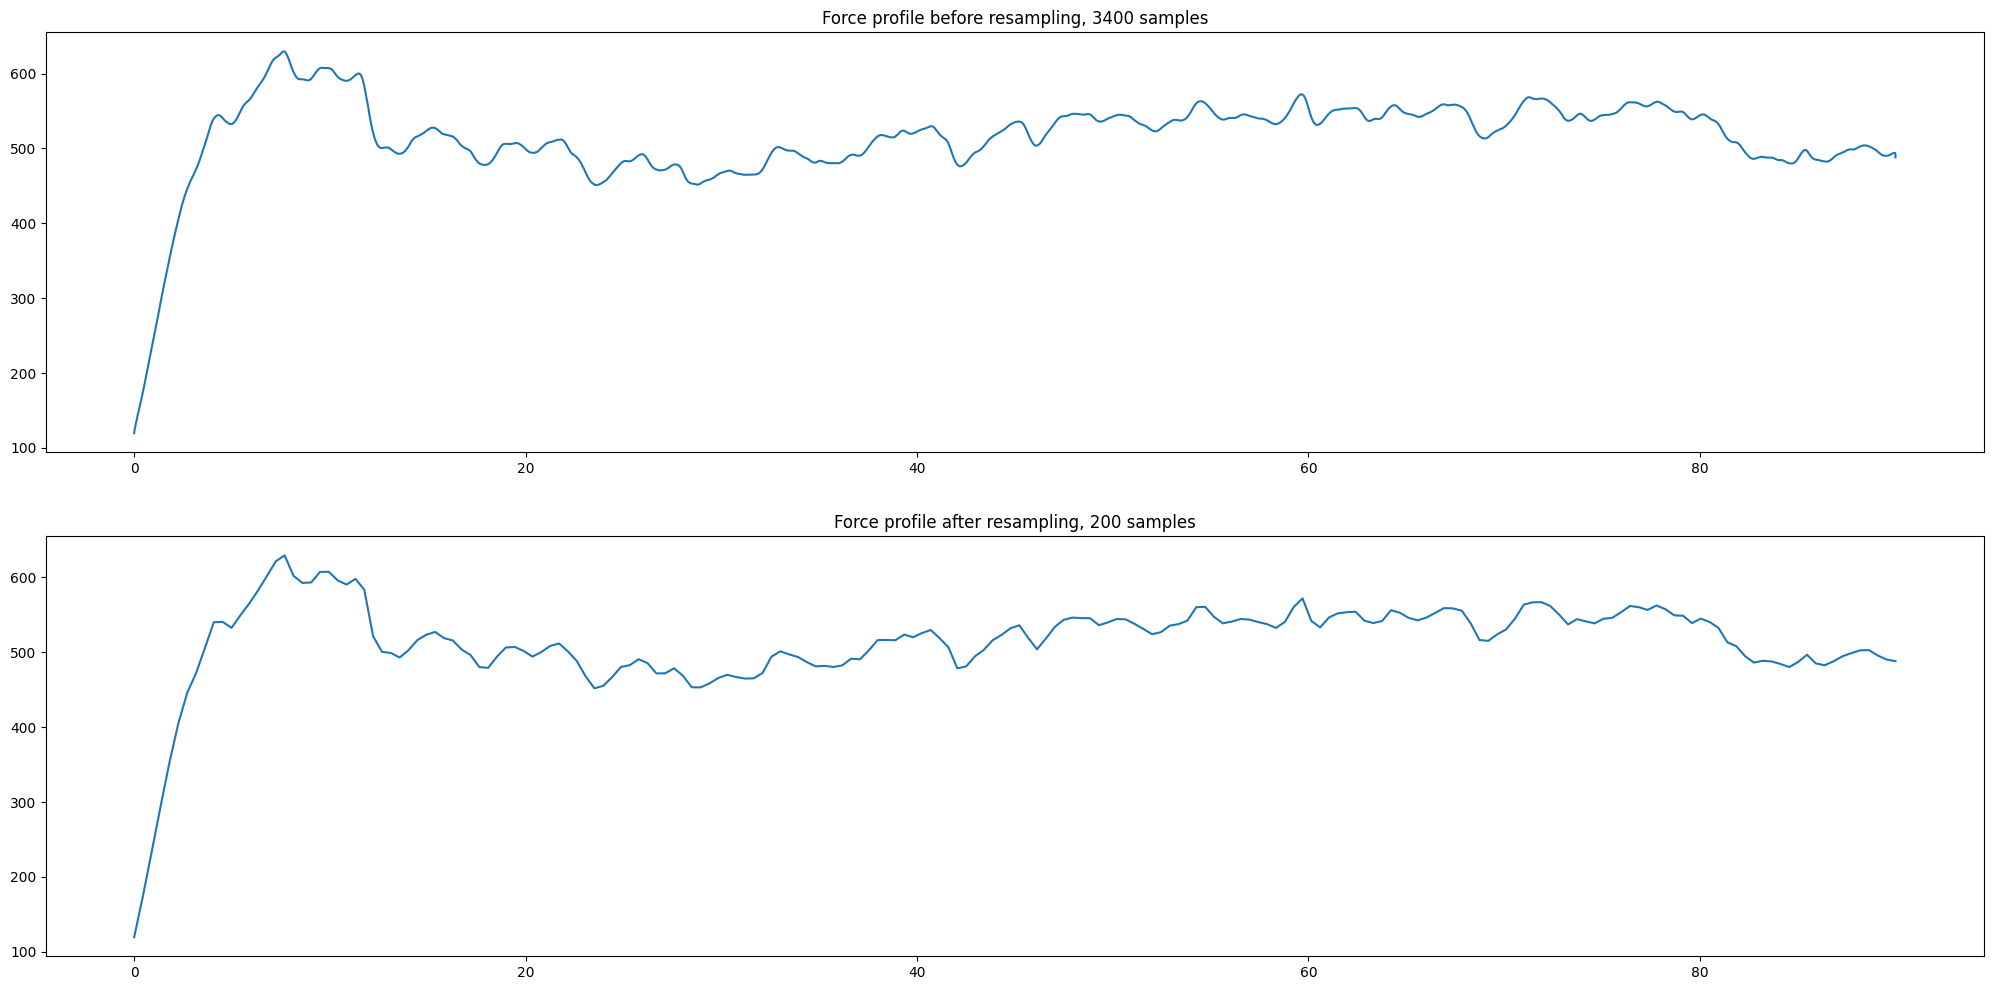

In [18]:
for sample in obj['Texture_measures'].keys():
  force = obj['Texture_measures'][sample]['Force']
  strain = [i+100 for i in obj['Texture_measures'][sample]['Strain']] # Put the strain in the range 0-100
  
  interpolated_strain,interpolated_force = interpolate_spline(strain,force,x_bounds=(0,90), output_length=200)
  
  plt.figure(figsize=(25,12))
  plt.subplot(2, 1, 1)
  plt.plot(strain,force,label='Original')
  plt.title('Force profile before resampling, '+str(len(force))+' samples')
  plt.subplot(2, 1, 2)
  plt.plot(interpolated_strain,interpolated_force,label='Interpolated')
  plt.title('Force profile after resampling, '+str(len(interpolated_force))+' samples')
  plt.show()
  break

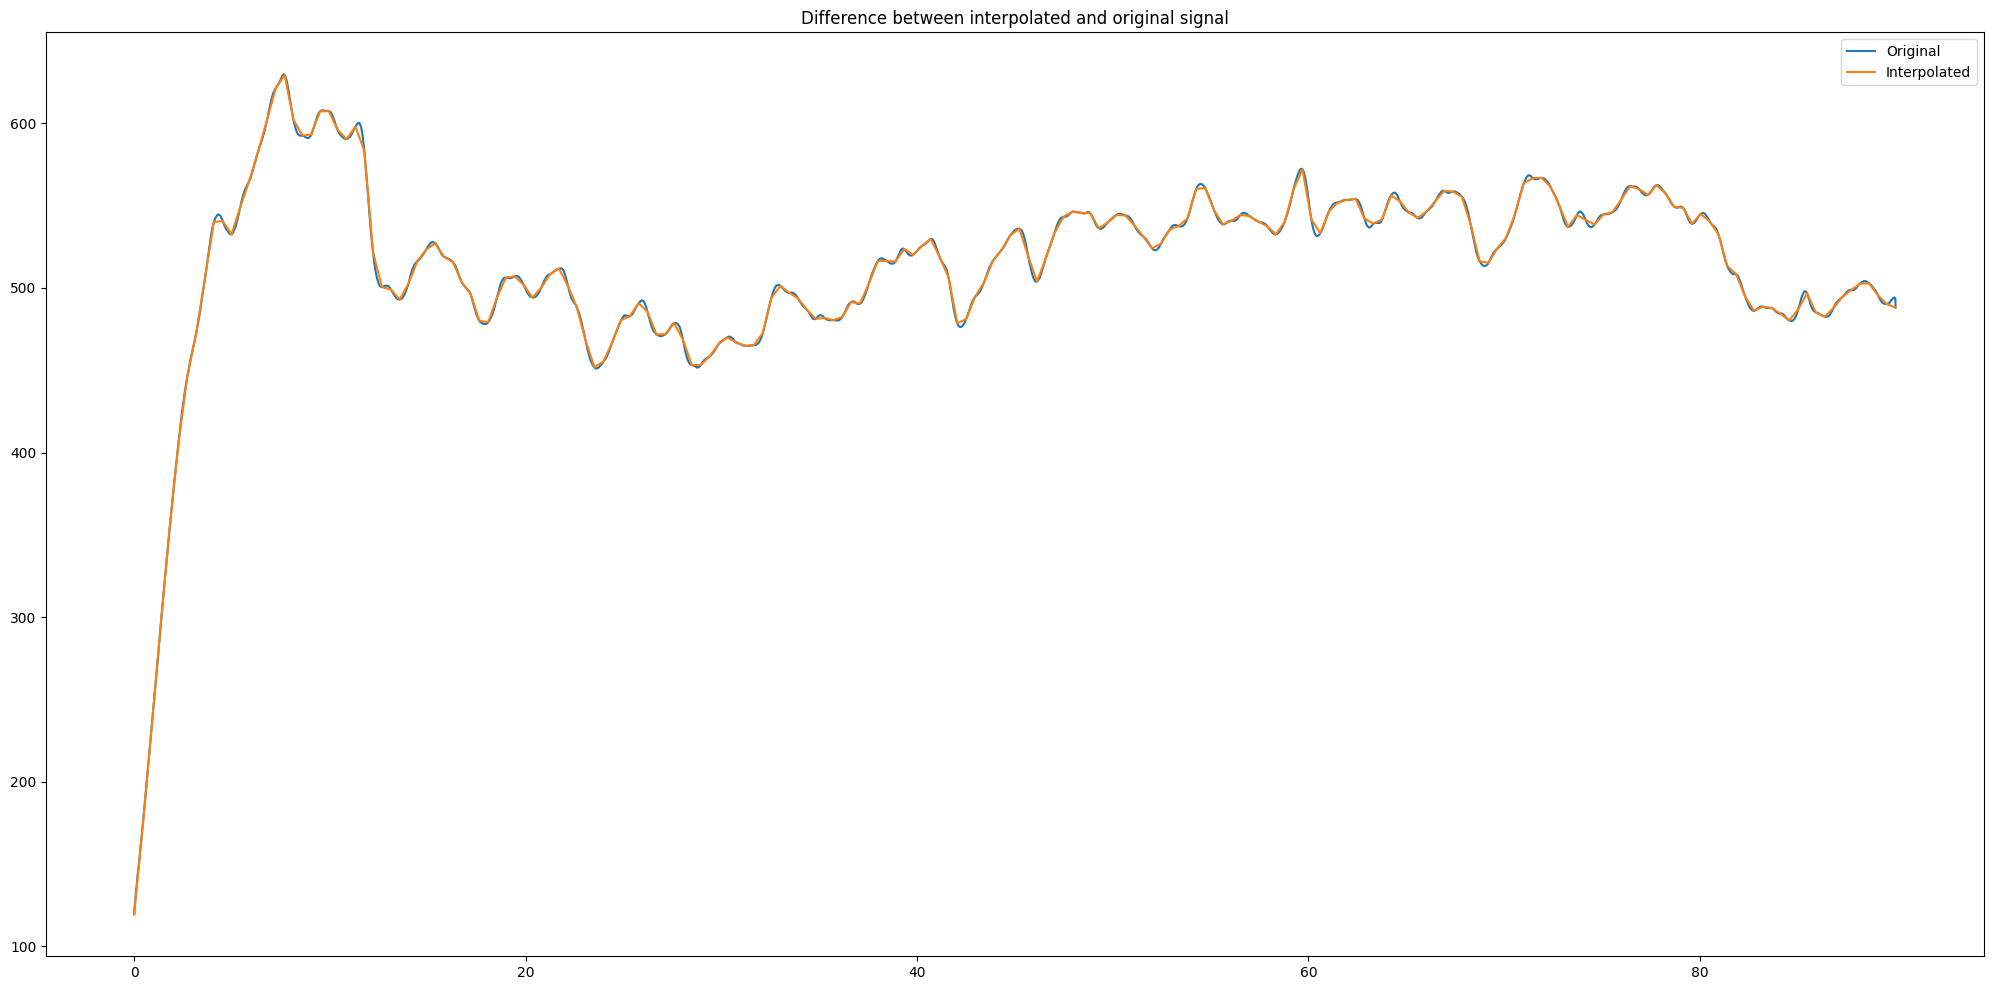

In [19]:
# Plot the differences between the two 
plt.figure(figsize=(25,12))
plt.plot(strain,force,label='Original')
plt.plot(interpolated_strain,interpolated_force,label='Interpolated')
plt.legend()
plt.title('Difference between interpolated and original signal')
plt.show()

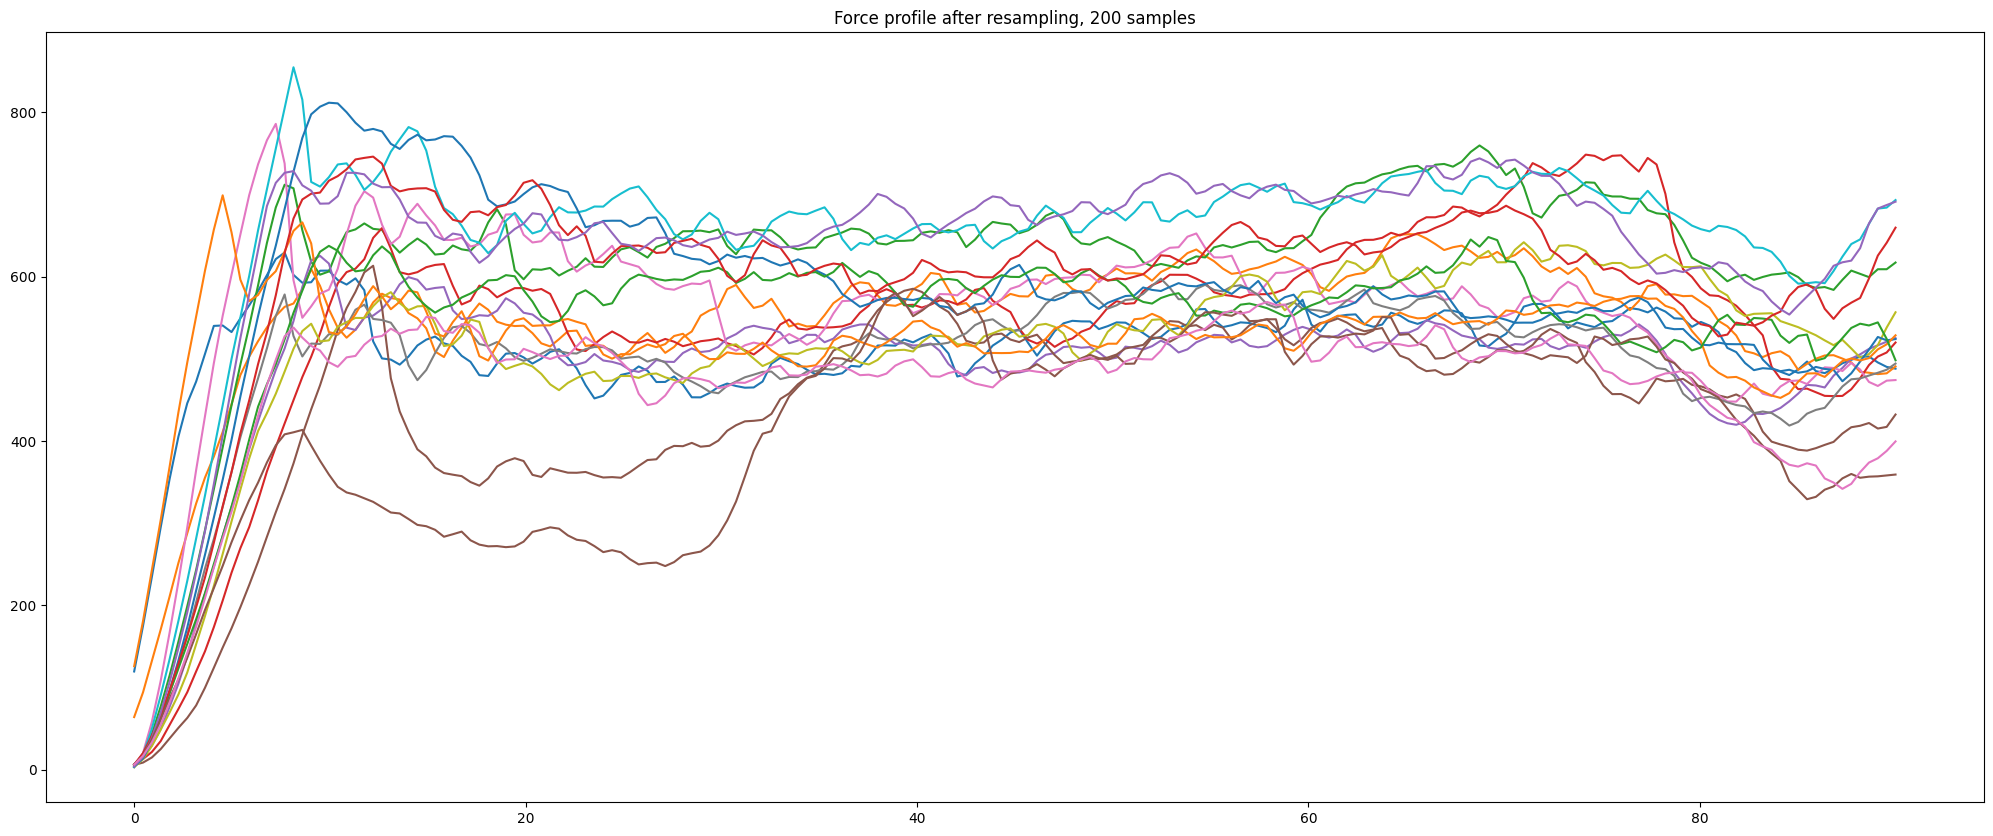

In [22]:
plt.figure(figsize=(25,10))

for sample in obj['Texture_measures'].keys():
  force = obj['Texture_measures'][sample]['Force']
  strain = [i+100 for i in obj['Texture_measures'][sample]['Strain']] # Put the strain in the range 0-100
  
  interpolated_strain,interpolated_force = interpolate_spline(strain,force,x_bounds=(0,90),output_length=200)
  
  plt.plot(interpolated_strain,interpolated_force)
  plt.title('Force profile after resampling, '+str(len(interpolated_force))+' samples')

plt.show()

We can see that for each measure, several profiles have been obtained using different samples, each one coming from a different apple.

A good practice is to average all the samples to create a single profile.


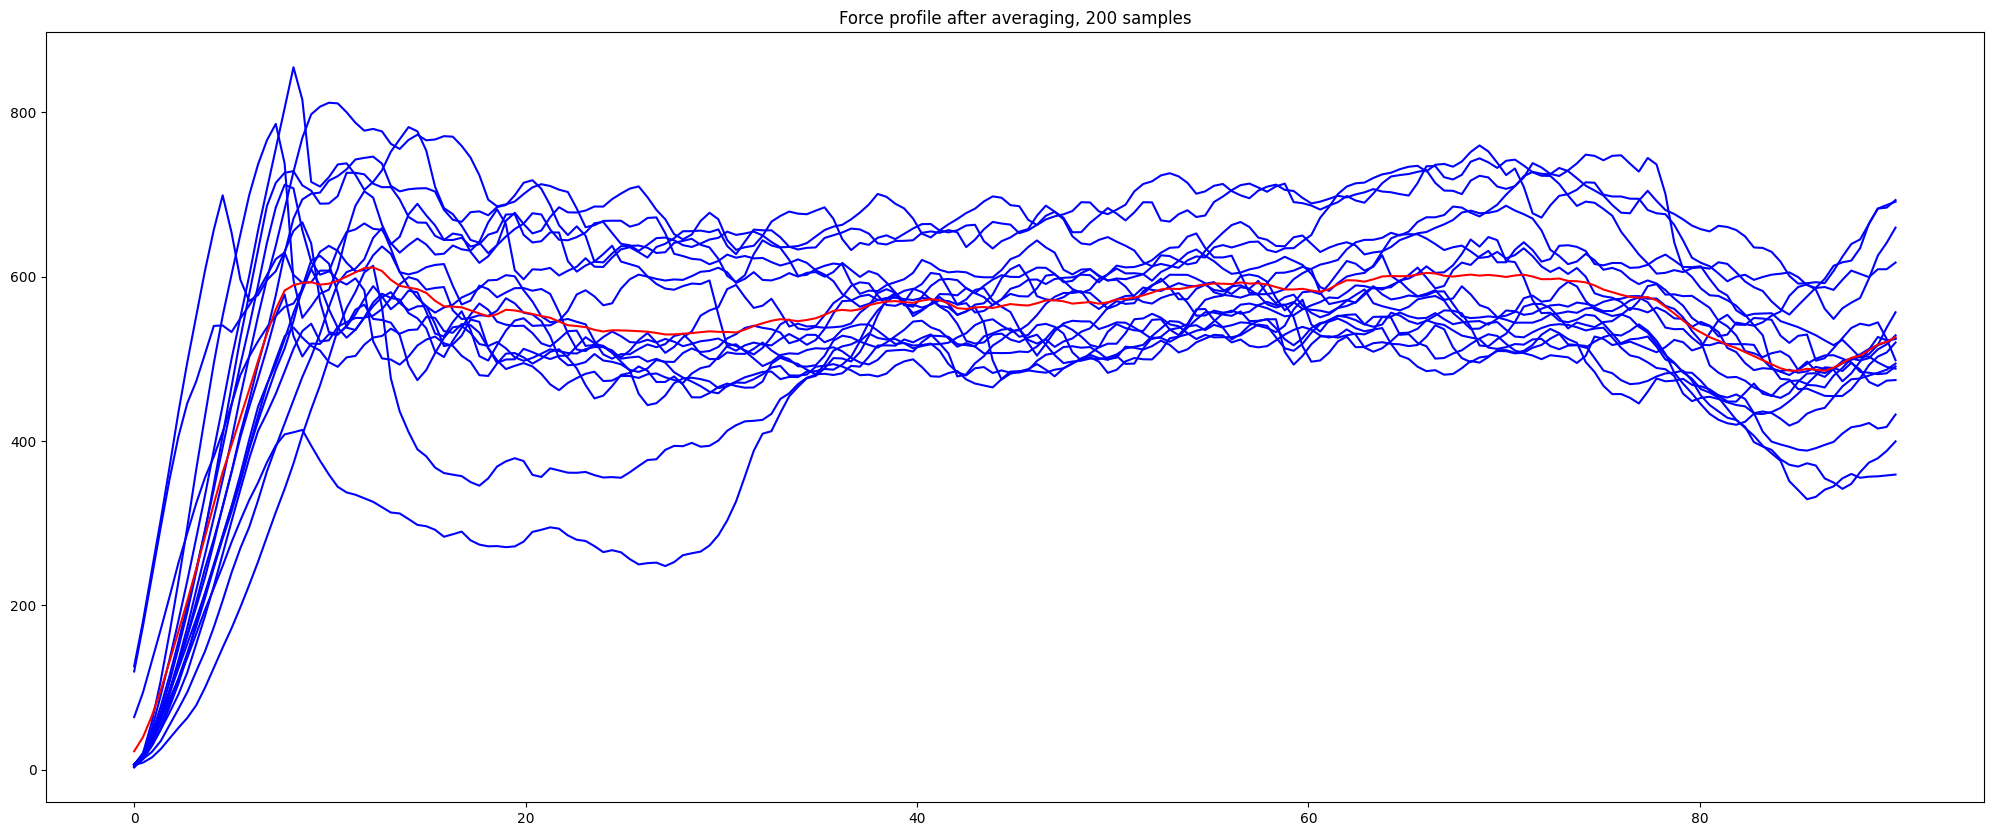

In [24]:
plt.figure(figsize=(25,10))

temp_force = np.zeros((len(obj['Texture_measures'].keys()),200))

j = 0 
for sample in obj['Texture_measures'].keys():
  force = obj['Texture_measures'][sample]['Force']
  strain = [i+100 for i in obj['Texture_measures'][sample]['Strain']]
  interpolated_strain,interpolated_force = interpolate_spline(strain,force,x_bounds=(0,90),output_length=200)
  temp_force[j,:] = interpolated_force
  plt.plot(interpolated_strain,interpolated_force,c='blue')
  j+=1

averaged_force = np.mean(temp_force,axis=0)

plt.plot(interpolated_strain,averaged_force,c='red')
plt.title('Force profile after averaging, '+str(len(interpolated_force))+' samples')
plt.show()

In [25]:
# Now we have a look at the targets 
for filename in os.listdir(path_targets):
  with open(os.path.join(path_targets,filename), 'rb') as file:
    print('Loading features of apple sample n ' + filename)
    obj = pickle.load(file)
  break

for key in obj.keys():
  print('- '+key)

print('\n')
print('Juiceness = '+str(obj['Juiceness']))
print('------------')
print('Hardness = '+str(obj['Hardness']))
print('------------')
print('Flouriness = '+str(obj['Flouriness']))
print('------------')
print('Chrunchiness_first_bite = '+str(obj['Chrunchiness_first_bite']))
print('------------')
print('Chrunchiness_chewing = '+str(obj['Chrunchiness_chewing']))
print('------------')
print('Fibrousness = '+str(obj['Fibrousness']))
print('------------')
print('Graininess = '+str(obj['Graininess']))

Loading features of apple sample n 1
- Juiceness
- Hardness
- Flouriness
- Chrunchiness_first_bite
- Chrunchiness_chewing
- Fibrousness
- Graininess


Juiceness = 40.875
------------
Hardness = 21.1666666666667
------------
Flouriness = 43.0
------------
Chrunchiness_first_bite = 24.583333333333336
------------
Chrunchiness_chewing = 20.5
------------
Fibrousness = 17.666666666666668
------------
Graininess = 51.625


For this lab, we will focus on "hardness" and "graininess", for which the data is complete!

In [27]:
# This piece of code will perform interpolation and averaging for each one of the 232 measures in the dataset 
from tqdm import tqdm 

# Features 
processed_force = np.zeros((len(os.listdir(path_raw_data)),200))
processed_sound = np.zeros((len(os.listdir(path_raw_data)),200))
# Targets
hardness = np.zeros((len(os.listdir(path_targets)),1))
graininess = np.zeros((len(os.listdir(path_targets)),1))

i=0
for filename in tqdm(os.listdir(path_raw_data)):
  with open(os.path.join(path_raw_data,filename),'rb') as data:
    obj = pickle.load(data)
  # Create temporary matrices
  temp_force = np.zeros((len(obj['Texture_measures'].keys()),200))
  temp_sound = np.zeros((len(obj['Texture_measures'].keys()),200))
  j = 0
  for key in obj['Texture_measures'].keys():
    strain = [i+100 for i in obj['Texture_measures'][key]['Strain']]
    force = obj['Texture_measures'][key]['Force']
    sound = obj['Texture_measures'][key]['Sound']
    interpolated_values_force = interpolate_spline(strain,force,x_bounds=(0,90),output_length=200)
    interpolated_values_sound = interpolate_spline(strain,sound,x_bounds=(0,90),output_length=200)
    temp_force[j,:] = interpolated_values_force[1]
    temp_sound[j,:] = interpolated_values_sound[1]
    j+=1
  
  processed_force[i,:] = np.mean(temp_force,axis=0)
  processed_sound[i,:] = np.mean(temp_sound,axis=0)

  with open(os.path.join(path_targets,filename),'rb') as data:
    obj = pickle.load(data)
  hardness[i,0] = obj['Hardness']
  graininess[i,0] = obj['Graininess']
  i+=1

# SAVING THE MATRICES 
with open(os.path.join('force.pkl'),'wb') as file:
  pickle.dump(processed_force,file)
with open(os.path.join('sound.pkl'),'wb') as file:
  pickle.dump(processed_sound,file)
with open(os.path.join('hardness.pkl'),'wb') as file:
  pickle.dump(hardness,file)
with open(os.path.join('graininess.pkl'),'wb') as file:
  pickle.dump(graininess,file)

100%|██████████| 323/323 [00:27<00:00, 11.92it/s]


(323, 200)
(323, 200) 



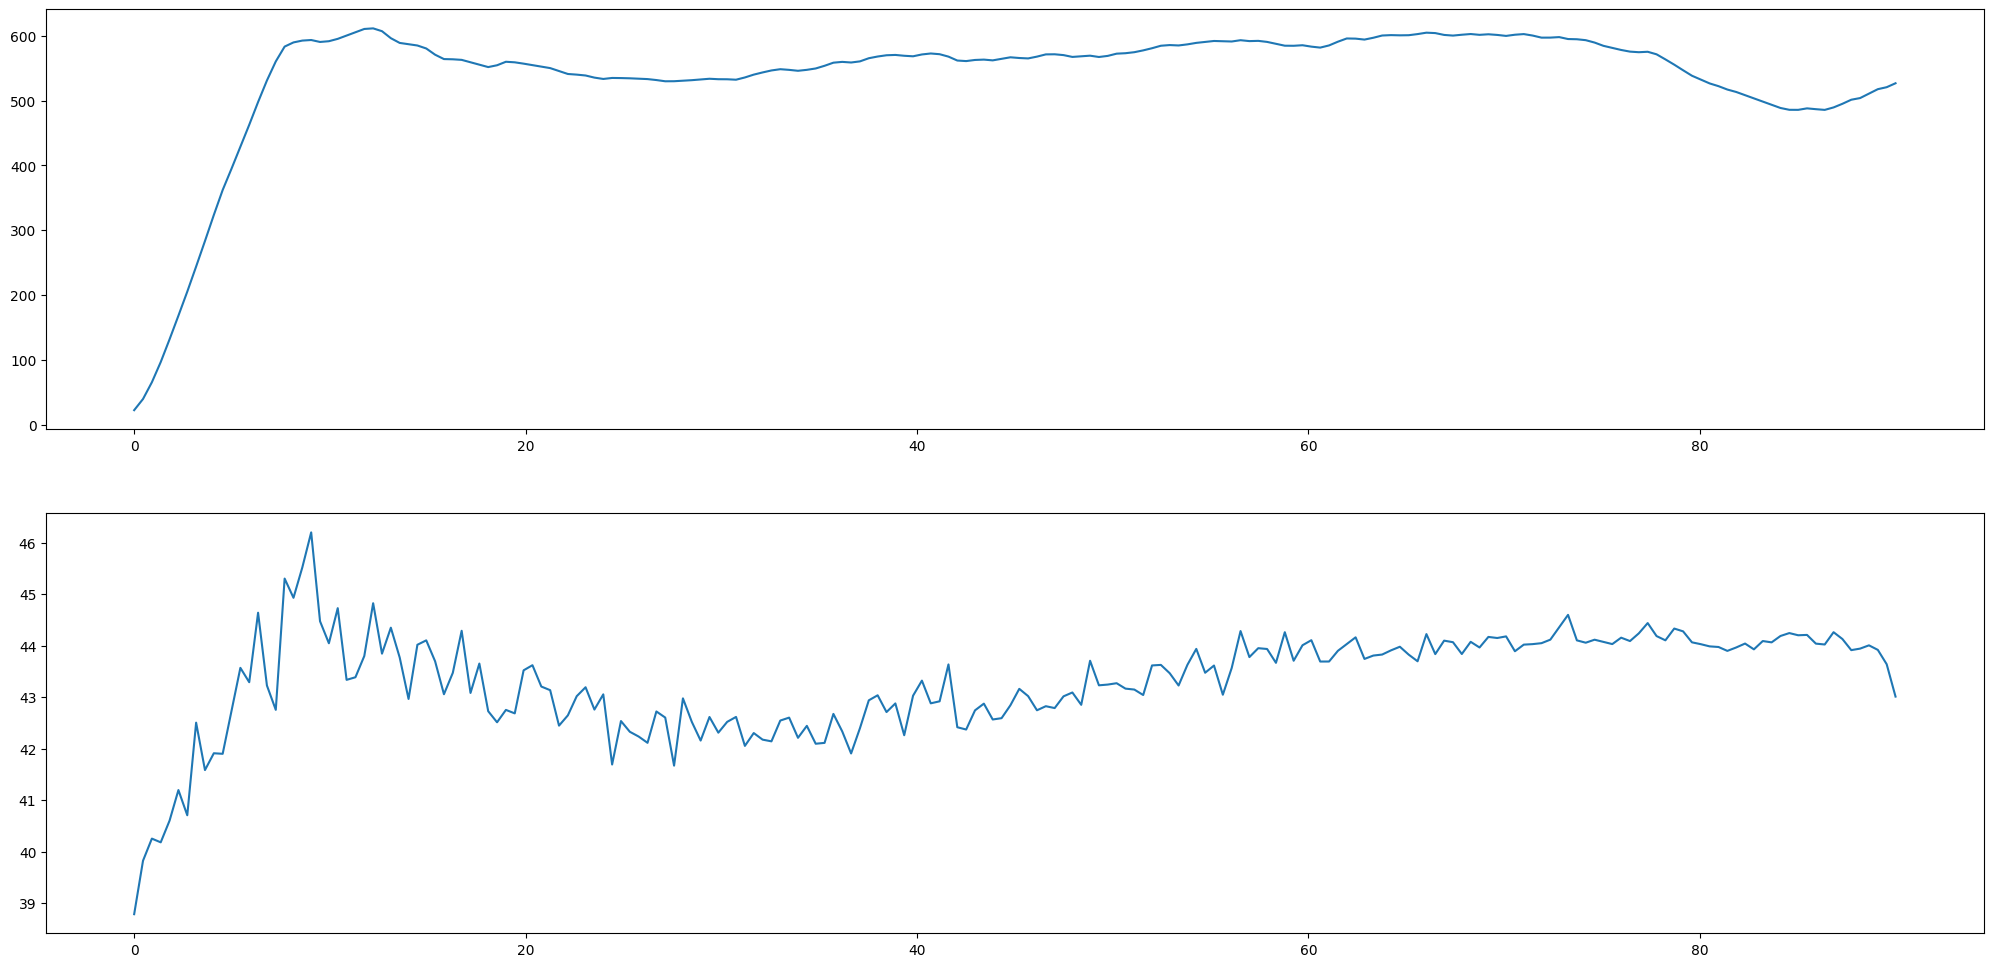

In [28]:
# Test if we made it all correct 
with open(os.path.join('force.pkl'),'rb') as file:
  force = pickle.load(file)

with open(os.path.join('sound.pkl'),'rb') as file:
  sound = pickle.load(file)

print(force.shape)
print(sound.shape,'\n')

plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
plt.plot(np.linspace(0,90,200),force[0,:])
plt.subplot(2,1,2)
plt.plot(np.linspace(0,90,200),sound[0,:])
plt.show()

In [29]:
with open(os.path.join('hardness.pkl'),'rb') as file:
  hardness = pickle.load(file)
with open(os.path.join('graininess.pkl'),'rb') as file:
  graininess = pickle.load(file)

print(hardness.shape)
print(graininess.shape)

(323, 1)
(323, 1)


In [30]:
# TRAIN TEST SPLIT CREATION 
import random

train_portion = 0.7
random.seed(15) # Fix seed to compute always the same split for reproducibility

# Shuffle the dataset 
indices = [i for i in range(force.shape[0])]
random.shuffle(indices)
train_indices = indices[:int(force.shape[0]*train_portion)]
test_indices = indices[int(force.shape[0]*train_portion):]

# Features 
train_force = force[train_indices,:]
train_sound = sound[train_indices,:]
test_force = force[test_indices,:]
test_sound = sound[test_indices,:]
# Targets 
train_hardness = hardness[train_indices,:]
train_graininess = graininess[train_indices,:]
test_hardness = hardness[test_indices,:]
test_graininess = graininess[test_indices,:]

# Minmax scale the features
# Remember to not let any information leakage in the data! 
min_force = np.min(np.min(train_force))
max_force = np.max(np.max(train_force))
min_sound = np.min(np.min(train_sound))
max_sound = np.max(np.max(train_sound))

# Transform both the matrices
train_force = (train_force-min_force)/(max_force-min_force)
train_sound = (train_sound-min_sound)/(max_sound-min_sound)

test_force = (test_force-min_force)/(max_force-min_force)
test_sound = (test_sound-min_sound)/(max_sound-min_sound)

# Transform the targets 
train_hardness/=100
train_graininess/=100
test_hardness/=100
test_graininess/=100

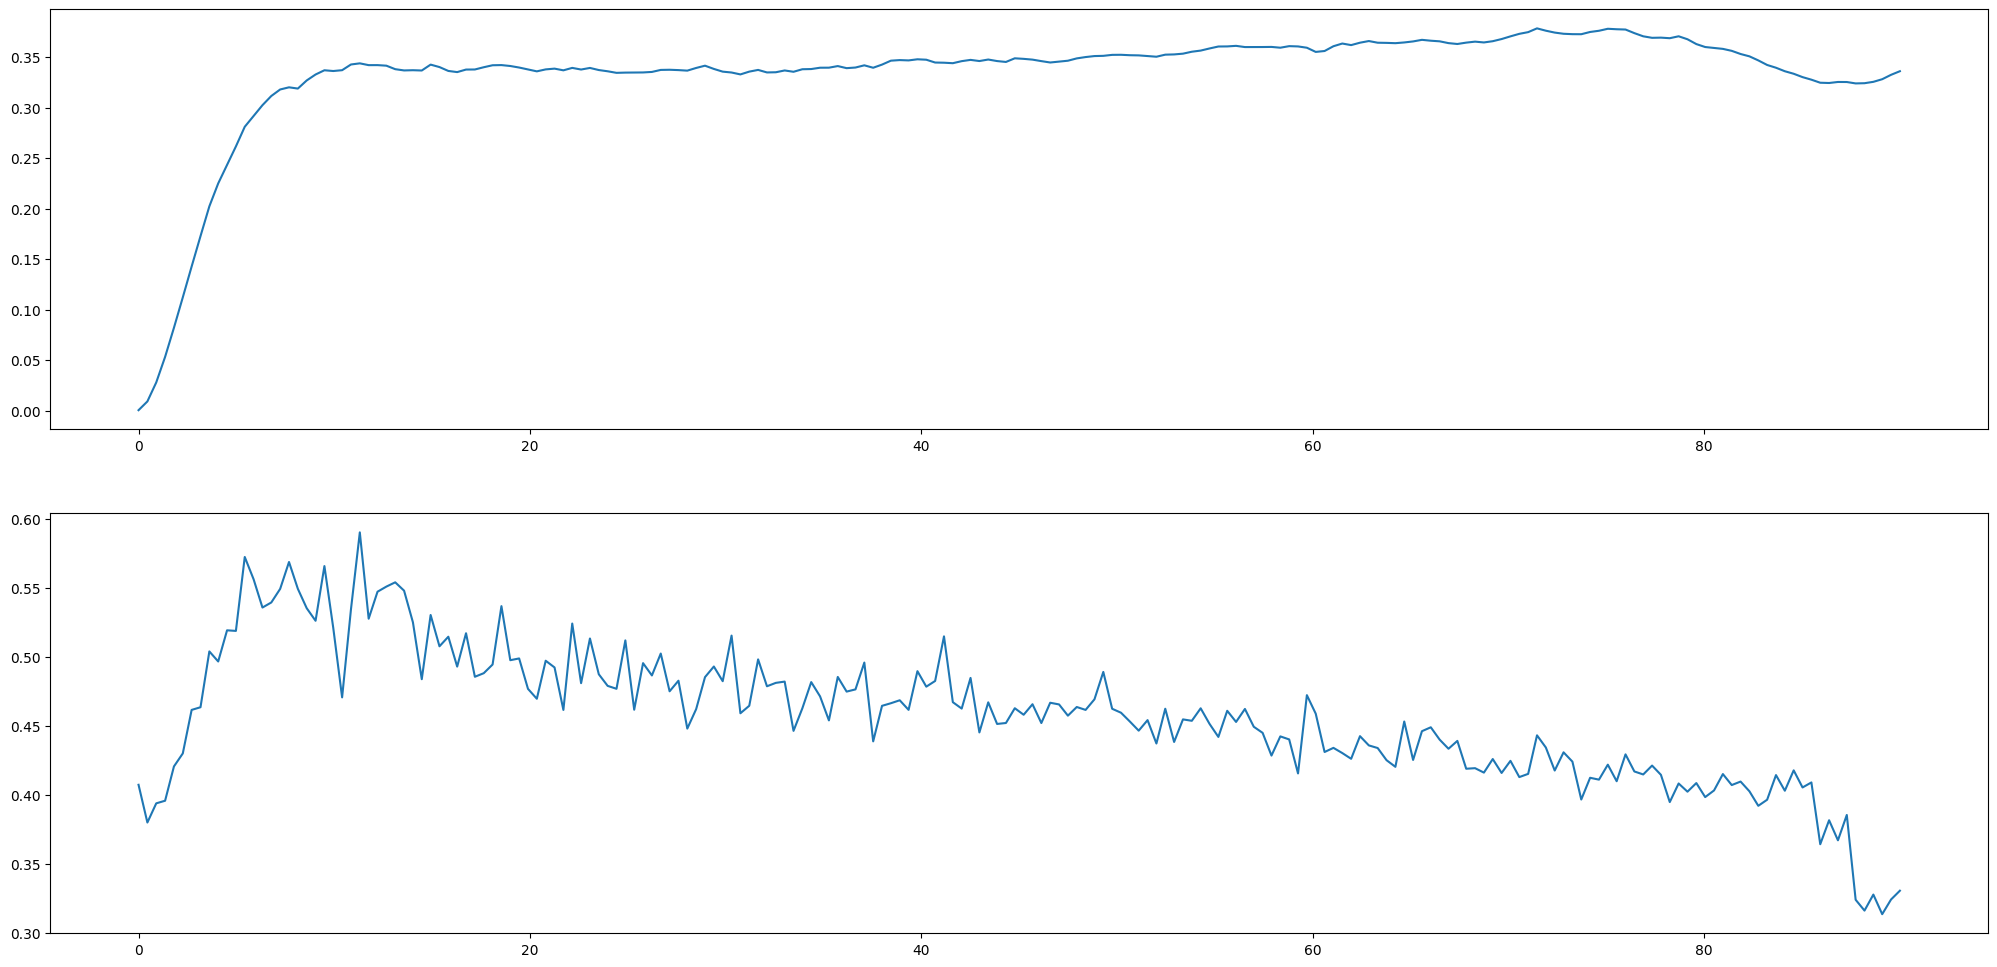

In [31]:
plt.figure(figsize=(25,12))
plt.subplot(2,1,1)
plt.plot(np.linspace(0,90,200),train_force[0,:])
plt.subplot(2,1,2)
plt.plot(np.linspace(0,90,200),train_sound[0,:])
plt.show()

FEATURE EXTRACTION

In [32]:
# Which can be some features that can be extracted by the force and/or sound profile, which can help to predict the hardness and chrunchiness sensory properties??
# Something I tought about are 
# - max force (the higher, the more hard the sample?)
# - max sound (the higher, the more grainy the sample?)
# - variance of the sound (the less variance, the more grainy the apple?)

def get_max(in_matrix):
  # Every row of the matrix will be a sample
  # Must return an array of the maximum of each matrix
  maximums = np.max(in_matrix, axis=1)
  return maximums

def get_variance(in_matrix):
  variances = np.var(in_matrix, axis=1)
  return variances


In [33]:
# Extract the features and prepare the matrices for regression
# Prepare the training matrix (should be of dimension (n_train_samples, n_features))
force_max = get_max(train_force)

X_train = np.zeros((train_force.shape[0],1))
X_train[:,0] = force_max
print('Features')
print(X_train.shape)
# Prepare the test matrix (should be of dimension (n_test_samples, n_features))
force_max = get_max(test_force)

X_test = np.zeros((test_force.shape[0],1))
X_test[:,0] = force_max

print(X_test.shape)
print('Targets')
print(train_hardness.shape)
print(test_hardness.shape)

Features
(226, 1)
(97, 1)
Targets
(226, 1)
(97, 1)


VISUALIZE SOME CORRELATIONS

In [38]:
from scipy.stats import pearsonr

fig,axs = plt.subplots(1,2,figsize=(25,12))
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].scatter(X_train[:,0],train_graininess)
pearson_coeff_graininess,_ = pearsonr(X_train[:,0],train_graininess)
axs[0].set_title('Graininess vs max force, pearson corr. coeff = '+str(pearson_coeff_graininess))

axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1)
axs[1].scatter(X_train[:,0],train_hardness)
pearson_coeff_hardness,_ = pearsonr(X_train[:,0],train_hardness)
axs[1].set_title('Hardness vs max force, pearson corr. coeff = '+str(pearson_coeff_hardness))
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

PREDICTIONS 

In [15]:
from sklearn.linear_model import LinearRegression
# Simple linear regression for hardness
linear_regressor_hardness = LinearRegression(fit_intercept=True)
linear_regressor_hardness.fit(X_train,train_hardness)
prediction_linear_hardness = linear_regressor_hardness.predict(X_test)
# Simple linear regression for graininess
linear_regressor_graininess = LinearRegression(fit_intercept=True)
linear_regressor_graininess.fit(X_train,train_graininess)
prediction_linear_graininess = linear_regressor_graininess.predict(X_test)

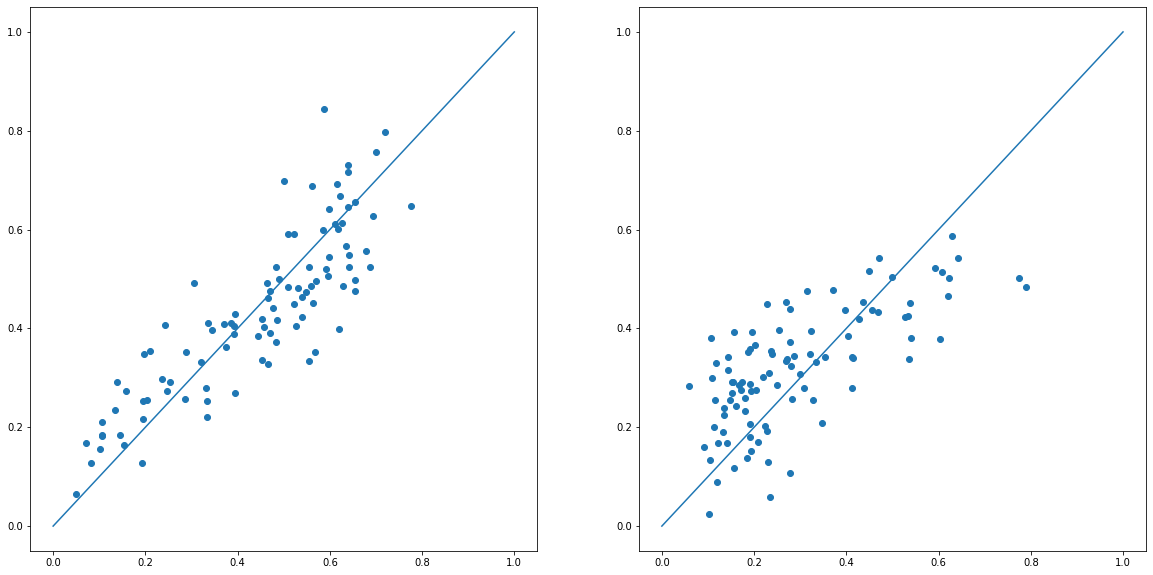

In [16]:
# Plot the predictions
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(test_hardness,prediction_linear_hardness)
plt.plot([0,1],[0,1])
plt.subplot(1,2,2)
plt.scatter(test_graininess,prediction_linear_graininess)
plt.plot([0,1],[0,1])
plt.show()

In [17]:
from sklearn.svm import SVR
# SVR regression for hardness
svr_regressor_hardness = SVR()
svr_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_SVR_hardness = svr_regressor_hardness.predict(X_test)
# SVR regression for graininess
svr_regressor_graininess = SVR()
svr_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_SVR_graininess = svr_regressor_graininess.predict(X_test)

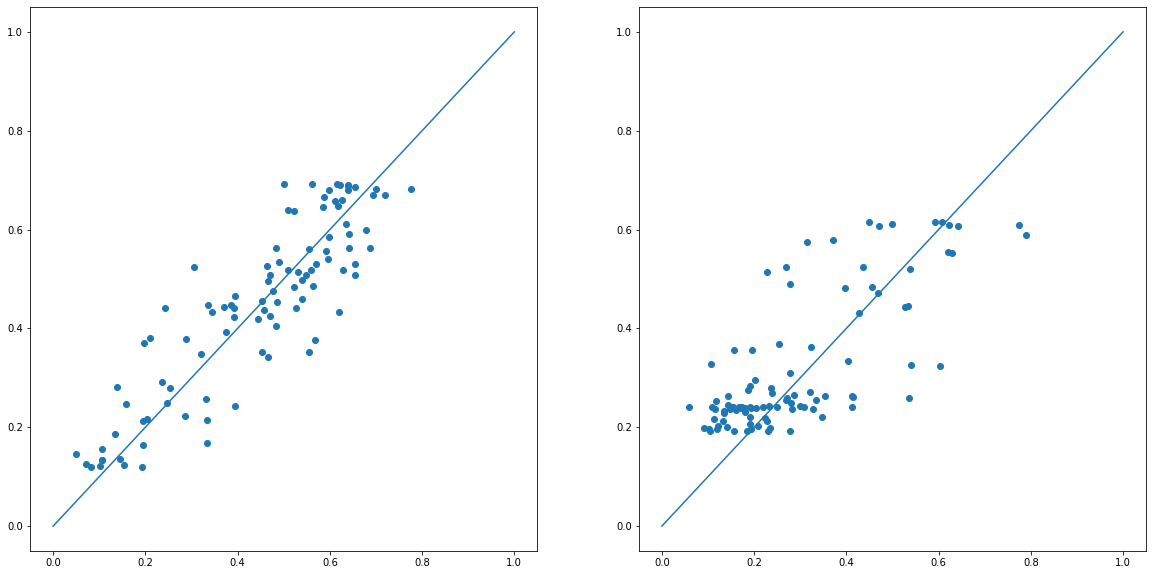

In [18]:
# Plot the predictions
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(test_hardness,prediction_SVR_hardness)
plt.plot([0,1],[0,1])
plt.subplot(1,2,2)
plt.scatter(test_graininess,prediction_SVR_graininess)
plt.plot([0,1],[0,1])
plt.show()

In [19]:
from sklearn.neural_network import MLPRegressor
# MLP regression for hardness
mlp_regressor_hardness = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_MLP_hardness = mlp_regressor_hardness.predict(X_test)
# MLP regression for graininess
mlp_regressor_graininess = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_MLP_graininess = mlp_regressor_graininess.predict(X_test)

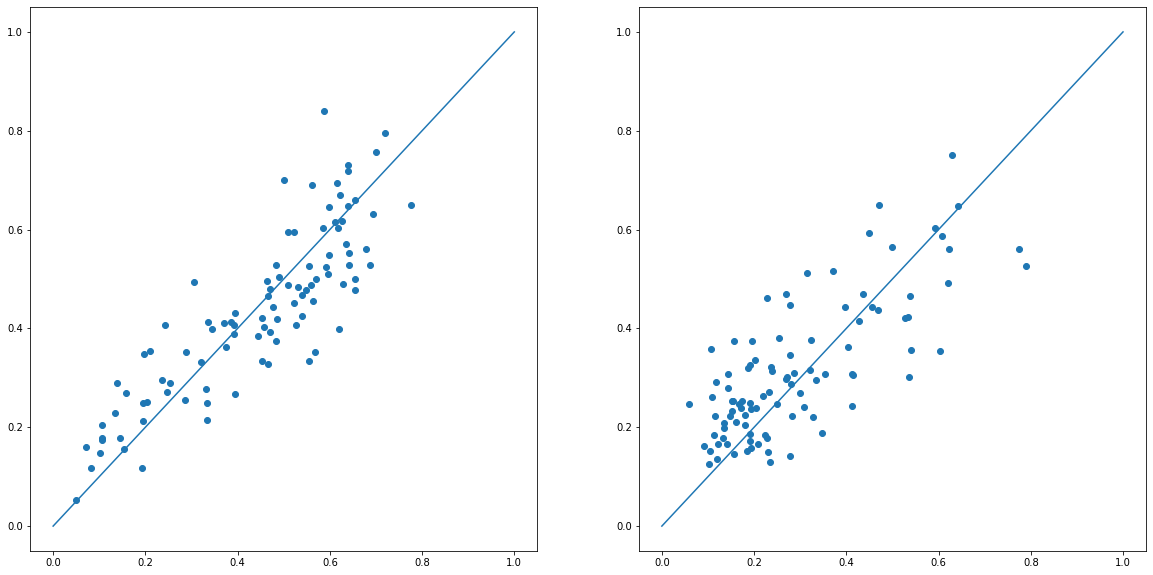

In [20]:
# Plot the predictions
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(test_hardness,prediction_MLP_hardness)
plt.plot([0,1],[0,1])
plt.subplot(1,2,2)
plt.scatter(test_graininess,prediction_MLP_graininess)
plt.plot([0,1],[0,1])
plt.show()

In [21]:
# In order to see if the prediction is good, we must have a way to evaluate it! 
from sklearn.metrics import mean_squared_error

In [22]:
print('RMSE hardness linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_hardness,test_hardness))))
print('RMSE graininess linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_graininess,test_graininess))))

print('\nRMSE hardness MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_hardness,test_hardness))))
print('RMSE graininess MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_graininess,test_graininess))))

RMSE hardness linear model: 0.09622342932640993
RMSE graininess linear model: 0.12083055131770311

RMSE hardness SVR model: 0.08732032696141205
RMSE graininess SVR model: 0.11244388066287683

RMSE hardness MLP model: 0.09519786071098701
RMSE graininess MLP model: 0.11084384289684146


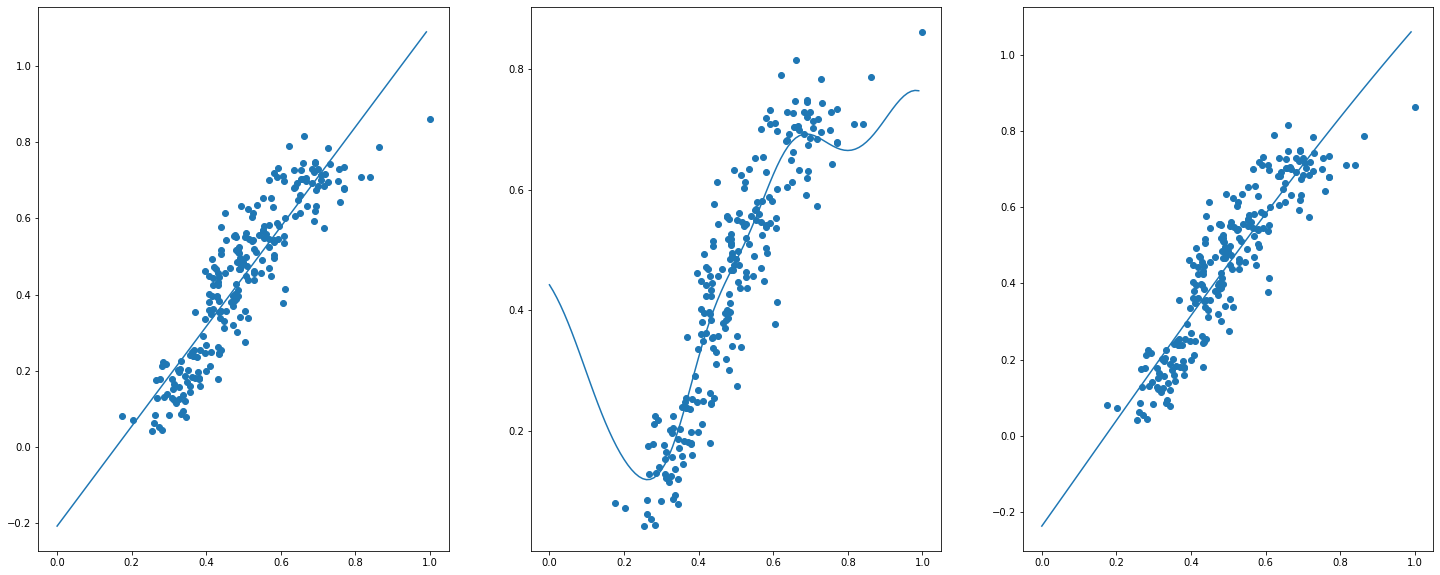

In [23]:
list_x = [i/100 for i in range(100)]
X_temp = np.zeros((100,1))
X_temp[:,0] = list_x

plt.figure(figsize=(25,10))

# PLOT THE LINEAR
plt.subplot(1,3,1)
list_y = linear_regressor_hardness.predict(X_temp)
plt.scatter(X_train[:,0],train_hardness)
plt.plot(X_temp,list_y)
# PLOT THE SVR! 
plt.subplot(1,3,2)
list_y = svr_regressor_hardness.predict(X_temp)
plt.scatter(X_train[:,0],train_hardness)
plt.plot(X_temp,list_y)
# PLOT THE MLP 
plt.subplot(1,3,3)
list_y = mlp_regressor_hardness.predict(X_temp)
plt.scatter(X_train[:,0],train_hardness)
plt.plot(X_temp,list_y)
plt.show()

IDEAS TO MAKE IT BETTER!

In [24]:
# Add more features!
# Prepare the training matrix (should be of dimension (n_train_samples, n_features))
force_max = get_max(train_force)
sound_max = get_max(train_sound)

X_train = np.zeros((train_force.shape[0],2))
X_train[:,0] = force_max
X_train[:,1] = sound_max

print(X_train.shape)
# Prepare the test matrix (should be of dimension (n_test_samples, n_features))
force_max = get_max(test_force)
sound_max = get_max(test_sound)

X_test = np.zeros((test_force.shape[0],2))
X_test[:,0] = force_max
X_test[:,1] = sound_max

print(X_test.shape)

(226, 2)
(97, 2)


In [26]:
# Simple linear regression for hardness
linear_regressor_hardness = LinearRegression(fit_intercept=True)
linear_regressor_hardness.fit(X_train,train_hardness)
prediction_linear_hardness = linear_regressor_hardness.predict(X_test)
# Simple linear regression for graininess
linear_regressor_graininess = LinearRegression(fit_intercept=True)
linear_regressor_graininess.fit(X_train,train_graininess)
prediction_linear_graininess = linear_regressor_graininess.predict(X_test)

# SVR regression for hardness
svr_regressor_hardness = SVR()
svr_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_SVR_hardness = svr_regressor_hardness.predict(X_test)
# SVR regression for graininess
svr_regressor_graininess = SVR()
svr_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_SVR_graininess = svr_regressor_graininess.predict(X_test)

# MLP regression for hardness
mlp_regressor_hardness = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_MLP_hardness = mlp_regressor_hardness.predict(X_test)
# MLP regression for graininess
mlp_regressor_graininess = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_MLP_graininess = mlp_regressor_graininess.predict(X_test)


print('RMSE hardness linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_hardness,test_hardness))))
print('RMSE graininess linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_hardness,test_hardness))))
print('RMSE chrunchiness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_graininess,test_graininess))))

print('\nRMSE hardness MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_hardness,test_hardness))))
print('RMSE chrunchiness MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_graininess,test_graininess))))

RMSE hardness linear model: 0.08126576673907134
RMSE graininess linear model: 0.09403840965052393

RMSE hardness SVR model: 0.07578689417355432
RMSE chrunchiness SVR model: 0.08562248558421925

RMSE hardness MLP model: 0.08033838072613186
RMSE chrunchiness MLP model: 0.09213713570376668


In [27]:
# Add more features!
# Prepare the training matrix (should be of dimension (n_train_samples, n_features))
force_max = get_max(train_force)
sound_max = get_max(train_sound)
force_var = get_variance(train_force)
sound_max = get_variance(train_sound)
X_train = np.zeros((train_force.shape[0],4))
X_train[:,0] = force_max
X_train[:,1] = sound_max
X_train[:,2] = force_var
X_train[:,3] = sound_max
print(X_train.shape)
# Prepare the test matrix (should be of dimension (n_test_samples, n_features))
force_max = get_max(test_force)
sound_max = get_max(test_sound)
force_var = get_variance(test_force)
sound_max = get_variance(test_sound)
X_test = np.zeros((test_force.shape[0],4))
X_test[:,0] = force_max
X_test[:,1] = sound_max
X_test[:,2] = force_var
X_test[:,3] = sound_max
print(X_test.shape)

(226, 4)
(97, 4)


In [28]:
# Simple linear regression for hardness
linear_regressor_hardness = LinearRegression(fit_intercept=True)
linear_regressor_hardness.fit(X_train,train_hardness)
prediction_linear_hardness = linear_regressor_hardness.predict(X_test)
# Simple linear regression for graininess
linear_regressor_graininess = LinearRegression(fit_intercept=True)
linear_regressor_graininess.fit(X_train,train_graininess)
prediction_linear_graininess = linear_regressor_graininess.predict(X_test)

# SVR regression for hardness
svr_regressor_hardness = SVR()
svr_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_SVR_hardness = svr_regressor_hardness.predict(X_test)
# SVR regression for graininess
svr_regressor_graininess = SVR()
svr_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_SVR_graininess = svr_regressor_graininess.predict(X_test)

# MLP regression for hardness
mlp_regressor_hardness = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_MLP_hardness = mlp_regressor_hardness.predict(X_test)
# MLP regression for graininess
mlp_regressor_graininess = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_MLP_graininess = mlp_regressor_graininess.predict(X_test)


print('RMSE hardness linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_hardness,test_hardness))))
print('RMSE graininess linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_MLP_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(prediction_MLP_graininess,test_graininess))))

RMSE hardness linear model: 0.07911804060070693
RMSE graininess linear model: 0.10799581560801809

RMSE hardness SVR model: 0.08654766101160347
RMSE graininess SVR model: 0.10776601094230365

RMSE hardness SVR model: 0.08914553809793446
RMSE graininess SVR model: 0.11995233253988064


In [29]:
# Ideas to make it better
# Use both the raw force and sound profiles as input features
# Prepare the training matrix (should be of dimension (n_train_samples, n_features))
X_train = np.concatenate((train_force,train_sound),axis=1)
print(X_train.shape)
# Prepare the test matrix (should be of dimension (n_test_samples, n_features))
X_test = np.concatenate((test_force,test_sound),axis=1)
print(X_test.shape)

(226, 400)
(97, 400)


In [30]:
# Simple linear regression for hardness
linear_regressor_hardness = LinearRegression(fit_intercept=True)
linear_regressor_hardness.fit(X_train,train_hardness)
prediction_linear_hardness = linear_regressor_hardness.predict(X_test)
# Simple linear regression for graininess
linear_regressor_graininess = LinearRegression(fit_intercept=True)
linear_regressor_graininess.fit(X_train,train_graininess)
prediction_linear_graininess = linear_regressor_graininess.predict(X_test)

# SVR regression for hardness
svr_regressor_hardness = SVR()
svr_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_SVR_hardness = svr_regressor_hardness.predict(X_test)
# SVR regression for graininess
svr_regressor_graininess = SVR()
svr_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_SVR_graininess = svr_regressor_graininess.predict(X_test)

# MLP regression for hardness
mlp_regressor_hardness = MLPRegressor(hidden_layer_sizes=(100),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_MLP_hardness = mlp_regressor_hardness.predict(X_test)
# MLP regression for graininess
mlp_regressor_graininess = MLPRegressor(hidden_layer_sizes=(100),activation='logistic',solver='lbfgs',random_state=1)
mlp_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_MLP_graininess = mlp_regressor_graininess.predict(X_test)

print('RMSE hardness linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_hardness,test_hardness))))
print('RMSE graininess linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_graininess,test_graininess))))

print('\nRMSE hardness MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_hardness,test_hardness))))
print('RMSE graininess MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_graininess,test_graininess))))

RMSE hardness linear model: 0.20140141965191347
RMSE graininess linear model: 0.25589253062201517

RMSE hardness SVR model: 0.07251622507546258
RMSE graininess SVR model: 0.08148337265250724

RMSE hardness MLP model: 0.06807100426974573
RMSE graininess MLP model: 0.0855658428486819


In [31]:
# Automatically find best parameters of SVR! 
from sklearn.model_selection import GridSearchCV

def predict_best(model,X_train,y_train,X_test):
  param_grid = [
    {'C': [0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
    {'C': [0.1, 0.5, 1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1], 'kernel': ['rbf']},
  ]
  clf = GridSearchCV(model, param_grid,verbose=True)
  clf.fit(X_train, y_train)
  print('\nThe best parameters are:')
  print(clf.best_params_)
  print('\n')
  return clf.predict(X_test)

In [32]:
# SVR regression for hardness
svr_regressor_hardness = SVR()
svr_regressor_hardness.fit(X_train,train_hardness.ravel())
prediction_SVR_hardness = svr_regressor_hardness.predict(X_test)
# SVR cross validated for hardness
svr_regressor_hardness_best = SVR()
best_prediction_SVR_hardness = predict_best(svr_regressor_hardness_best,X_train,train_hardness.ravel(),X_test)

# SVR regression for graininess
svr_regressor_graininess = SVR()
svr_regressor_graininess.fit(X_train,train_graininess.ravel())
prediction_SVR_graininess = svr_regressor_graininess.predict(X_test)

svr_regressor_graininess_best = SVR()
best_prediction_SVR_graininess = predict_best(svr_regressor_graininess_best,X_train,train_graininess.ravel(),X_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits

The best parameters are:
{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}


Fitting 5 folds for each of 40 candidates, totalling 200 fits

The best parameters are:
{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}




In [33]:
print('RMSE hardness linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_hardness,test_hardness))))
print('RMSE graininess linear model: '+str(np.sqrt(mean_squared_error(prediction_linear_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(prediction_SVR_graininess,test_graininess))))

print('\nRMSE hardness MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_hardness,test_hardness))))
print('RMSE graininess MLP model: '+str(np.sqrt(mean_squared_error(prediction_MLP_graininess,test_graininess))))

print('\nRMSE hardness SVR model: '+str(np.sqrt(mean_squared_error(best_prediction_SVR_hardness,test_hardness))))
print('RMSE graininess SVR model: '+str(np.sqrt(mean_squared_error(best_prediction_SVR_graininess,test_graininess))))

RMSE hardness linear model: 0.20140141965191347
RMSE graininess linear model: 0.25589253062201517

RMSE hardness SVR model: 0.07251622507546258
RMSE graininess SVR model: 0.08148337265250724

RMSE hardness MLP model: 0.06807100426974573
RMSE graininess MLP model: 0.0855658428486819

RMSE hardness SVR model: 0.0731079709774915
RMSE graininess SVR model: 0.07859501979283122


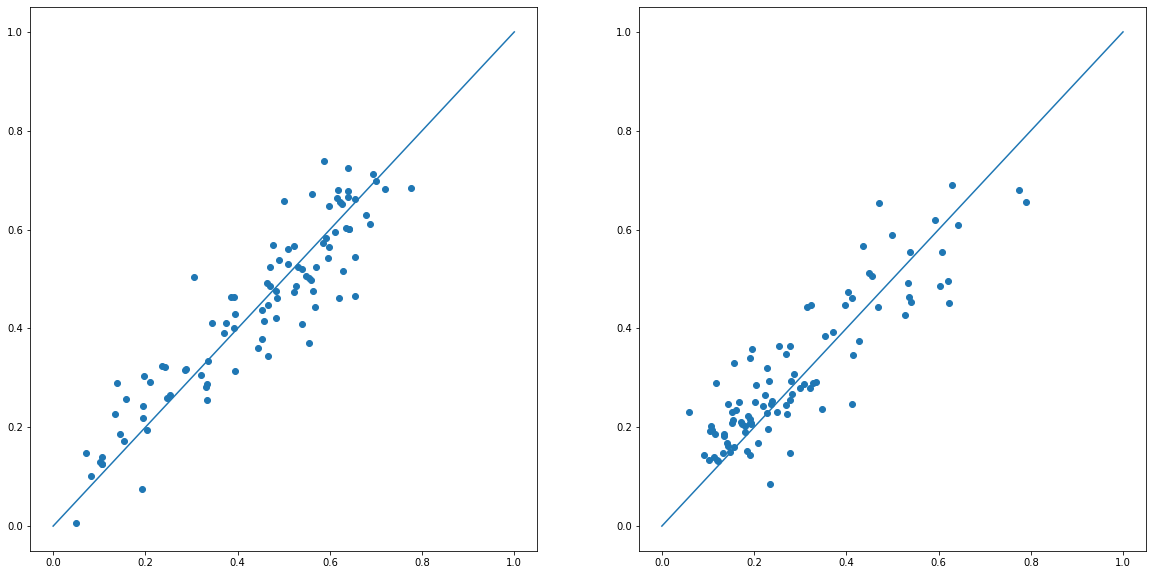

In [34]:
# SHOW RESULTS OF THE BEST MODEL 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(test_hardness,best_prediction_SVR_hardness)
plt.plot([0,1],[0,1])
plt.subplot(1,2,2)
plt.scatter(test_graininess,best_prediction_SVR_graininess)
plt.plot([0,1],[0,1])
plt.show()